In [1]:
import ngff_zarr as nz
import gcsfs
import numpy as np
import zarr
import neuroglancer
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
# Output path to use for the example below
# The user running this process will need to be authenticated
#   gcloud auth login
# and have write access to this bucket
gcs_base = "gs://ome-2025-test-data/ex1/out"

In [3]:
# Create a very exciting array: a 3D checker board
array = np.fromfunction(
    lambda i, j, k: ((i//8 + j//8 + k//8) % 2) * 255,
    (256, 1024, 1024),
    dtype=np.uint8)

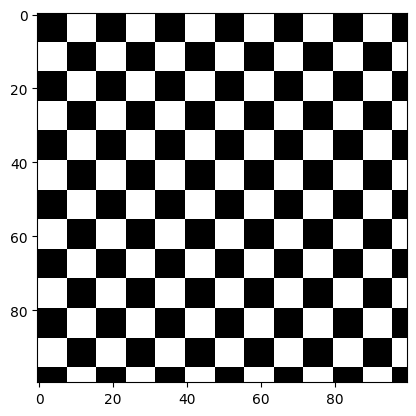

In [4]:
# Visualize a small 2D cutout
plt.imshow(array[0,0:100,0:100], cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
# Pass the array into ngff-zarr to add ngff metadata
image = nz.to_ngff_image(array, dims=['z','y','x'])

In [6]:
# Create a multiscales version
multiscale_image = nz.to_multiscales(image,
                                scale_factors=[2,4],
                                chunks=64)

In [7]:
checker_url = f'{gcs_base}/checkerboard.zarr'
print(f"Saving ngff to {gcs_base} ...")
nz.to_ngff_zarr(checker_url,
                multiscale_image, chunks_per_shard=8,
                version="0.5")
print("Done.")

Saving ngff to gs://ome-2025-test-data/ex1/out ...
Done.


In [8]:
# List the files generated
!gsutil ls -r $checker_url



Updates are available for some Google Cloud CLI components.  To install them,
please run:
  $ gcloud components update

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/:
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/zarr.json

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/:
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/zarr.json

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/:
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/zarr.json

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/:

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/:

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/0/:
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/0/0
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/0/1

gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/1/:
gs://ome-2025-test-data/ex1/out/checkerboard.zarr/scale0/image/c/0/1/0
gs://

## Web-based viewers

Once data has been saved to the cloud, we can immediately use web based viewers to examine.

_Note_: This assumes that the storage layer has public object access enabled and CORS heaeders set.

In [9]:
# Let's view the data
# Rewrite the gcs url to it's public https form
https_url = checker_url.replace("gs://", "https://storage.googleapis.com/")

In [10]:
# OME NGFF Validator
validator_url = f"https://ome.github.io/ome-ngff-validator/?source={https_url}"
display(HTML(f'<a href="{validator_url}">View NGFF Validator</a>'))

In [11]:
# biongff: https://github.com/BioNGFF/biongff-viewer
biongff_url = f"https://biongff.github.io/biongff-viewer/?source={https_url}"
display(HTML(f'<a href="{biongff_url}">View in biongff</a>'))

In [12]:
# neuroglancer: generate a state and encode it into the url
ng_state = {
  "layers": [
    {
      "type": "image",
      "source": "gs://ome-2025-test-data/ex1/out/checkerboard.zarr/|zarr3:",
      "tab": "source",
      "name": "checkerboard.zarr"
    }
  ]
}
ng_url = neuroglancer.url_state.to_url(ng_state)
display(HTML(f'<a href="{ng_url}">View in neuroglancer</a>'))